# 데이터 시각화


데이터 시각화 과정을 통해 전반적인 데이터에 대한 이해를 높이고, 데이터의 특징을 파악할 수 있다.

다음 내용에 대하여 시각화를 진행할 것이다.

- 변수별 특성 시각화 및 분석

- 모델을 통해 예측된 전체 데이터에 대한 지도 분포 시각화.


In [1]:
# Load Common Libraries
from typing import List, Tuple, Dict, Optional, Any, Union
import matplotlib.colors as mcolors
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd
from tqdm import tqdm
import pandas as pd
import numpy as np
import warnings
import folium
import random
import joblib
import os

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
# Define Path
main_path = os.getcwd()
original_dataset_path = os.path.join(main_path, 'data')
dataset_path = os.path.join(main_path, 'trans_data')

grid_centers_path = os.path.join(dataset_path, 'grid_centers.csv')
lpg_station_path = os.path.join(dataset_path, 'lpg_station.csv')
gas_station_path = os.path.join(dataset_path, 'gas_station.csv')

# 거리 기반 데이터
hydrogen_stations_path = os.path.join(dataset_path, 'hydrogen_station.csv')
baby_school_location_path = os.path.join(
    dataset_path, 'baby_school_location.csv')
school_location_path = os.path.join(dataset_path, 'school_location.csv')
elderly_center_path = os.path.join(dataset_path, 'elderly_center.csv')
fire_station_path = os.path.join(dataset_path, 'fire_station.csv')
rescue_station_path = os.path.join(dataset_path, 'rescue_station.csv')

# 교통량 및 인구 기반 데이터
traffic_data_path = os.path.join(dataset_path, 'traffic.csv')
hydrogen_car_count_path = os.path.join(dataset_path, 'hydrogen_car_count.csv')
population_density_path = os.path.join(dataset_path, 'population_density.csv')

# 결과가 저장된 데이터
combined_grid_centers_path = os.path.join(
    dataset_path, 'combined_grid_centers.csv')
combined_target_path = os.path.join(dataset_path, 'combined_targets.csv')

"""     =====================     Reference Data     =====================     """

seoul_detail_map_path = 'shp/seoul_submunicipalities.shp'
seoul_map_path = 'shp/seoul_municipalities.shp'
model_path = "random_forest_regressor_model.pkl"

In [3]:
# 데이터 로드
df = pd.read_csv(combined_grid_centers_path)

feature_names = ['school_distance', 'baby_school_distance', 'elderly_center_distance',
                 'fire_station_distance', 'rescue_station_distance', 'traffic_volume',
                 'hydrogen_car_count', 'population_density']
X = df[feature_names]
y = df['hydrogen_distance']
print(X.shape, y.shape)

(59012, 8) (59012,)


In [4]:
gdf = gpd.read_file(seoul_map_path)
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
points_gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

col_list = ['school_distance', 'baby_school_distance', 'elderly_center_distance', 'fire_station_distance',
            'rescue_station_distance', 'traffic_volume', 'hydrogen_car_count', 'population_density']
colormaps = [plt.cm.Reds, plt.cm.Blues, plt.cm.Greens, plt.cm.Oranges,
             plt.cm.Purples, plt.cm.pink, plt.cm.YlOrBr, plt.cm.BuGn]


def show_map(data: np.ndarray, save_path: Optional[str] = None, cmap=plt.cm.BuGn, show_map: bool = False):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    gdf.plot(ax=ax, color='none', edgecolor='none')
    gdf.plot(ax=ax, color='#F5DEB311', edgecolor='#00000022')

    norm = mcolors.Normalize(vmin=data.min(), vmax=data.max())

    points_gdf.plot(ax=ax, color=cmap(
        norm(data)), marker='o', markersize=0.1)

    ax.set_axis_off()
    if save_path:
        fig.savefig(save_path, dpi=300)

    if show_map:
        plt.show()
    else:
        plt.close(fig)

combined_graph.png 저장 완료


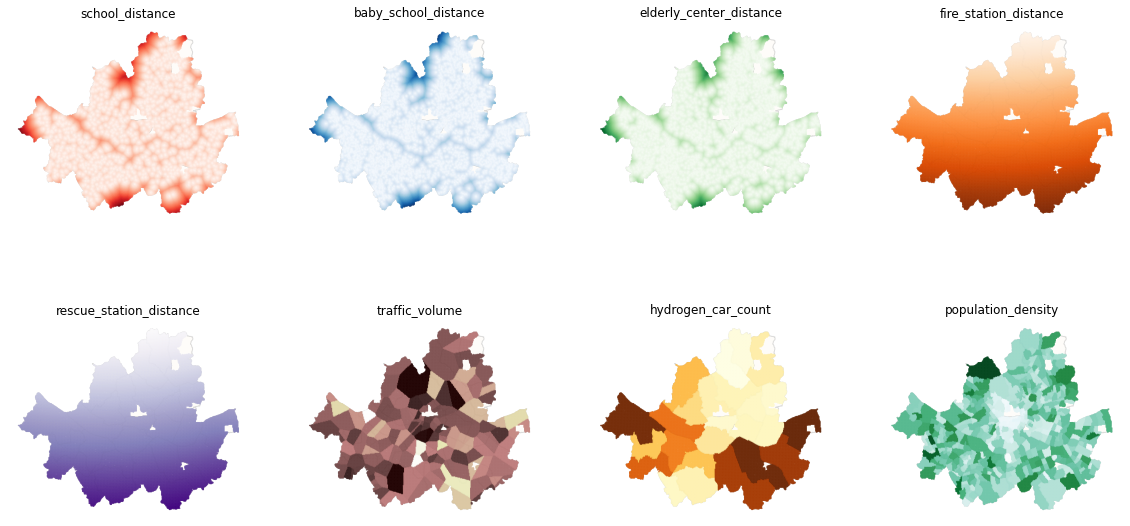

In [5]:
# 2x4 격자로 그래프 생성 및 저장
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for ax, col_name, cmap in zip(axes.flat, col_list, colormaps):
    gdf.plot(ax=ax, color='none', edgecolor='none')
    gdf.plot(ax=ax, color='#F5DEB311', edgecolor='#00000022')

    norm = mcolors.Normalize(vmin=df[col_name].min(), vmax=df[col_name].max())
    points_gdf.plot(ax=ax, color=cmap(
        norm(df[col_name])), marker='o', markersize=0.1)

    ax.set_title(col_name)
    ax.set_axis_off()

# 전체 격자 그래프 저장
fig.savefig('assets/combined_graph.png', dpi=300)
print('assets/combined_graph.png 저장 완료')
plt.show()

In [6]:
# 개별 파일로 저장
for col_name, cmap in zip(col_list, colormaps):
    show_map(df[col_name].values, f'assets/png/{col_name}.png', cmap)

## 모델 예측 데이터 시각화


(59012,)


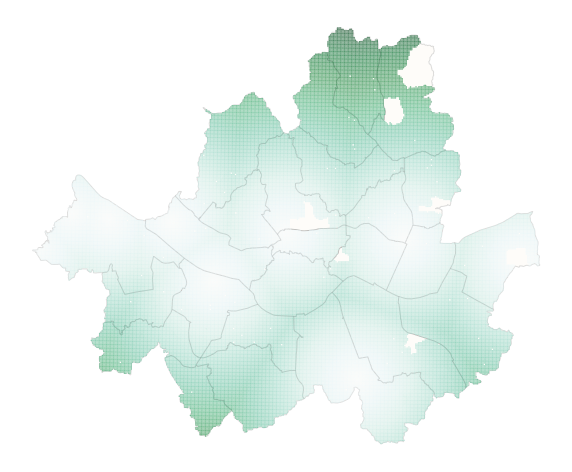

In [7]:
# 저장된 모델 불러오기
loaded_model = joblib.load(model_path)

# 불러온 모델로 예측 수행 (예: X의 첫 5개 샘플 예측)
predictions = loaded_model.predict(X)

# 예측 결과 출력
print(predictions.shape)
show_map(predictions, 'assets/png/predictions.png',
         colormaps[-1], show_map=True)